In [7]:
import scanpy as sc
import cellbin_moran as cm
from scipy.spatial import cKDTree
import pandas as pd
import seaborn as sns

In [2]:
xiangdata = sc.read_h5ad('/home1/jijh/st_project/downloads/mol_psy_data/downloads/MERFISH_Data.h5ad')

In [3]:

sample_dict = {sample: xiangdata[xiangdata.obs['sample'] == sample].copy() for sample in xiangdata.obs['sample'].unique()}

In [4]:
plaquedata = sc.read_h5ad('/home1/jijh/st_project/downloads/mol_psy_data/downloads/Plaques_Object.h5ad')

In [5]:
plaque_dict = {sample: plaquedata[plaquedata.obs['sample'] == sample].copy() for sample in plaquedata.obs['sample'].unique()}

In [6]:
# Check for intersection of keys between sample_dict and plaque_dict
intersection_keys = set(sample_dict.keys()).intersection(plaque_dict.keys())
print(intersection_keys)

intersection_keys = list(intersection_keys)

{'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_3/', 'Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_0/', 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_3/', 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_1/', 'Z:/Lab/MERFISH_Imaging data/202302031055_20230203TREM5xFAD-VZG171x04_VMSC05201/region_1/', 'Z:/Lab/MERFISH_Imaging data/202302031055_20230203TREM5xFAD-VZG171x04_VMSC05201/region_0/'}


# Moran's I

In [22]:
plaque = plaque_dict[intersection_keys[0]].copy()
adata = sample_dict[intersection_keys[0]].copy()

In [23]:
adata

AnnData object with n_obs × n_vars = 56273 × 300
    obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine', 'celltype', 'distance_to_plaque'
    uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'Normalized_Expression', 'RNA'
    obsp: 'connectivities', 'distances'

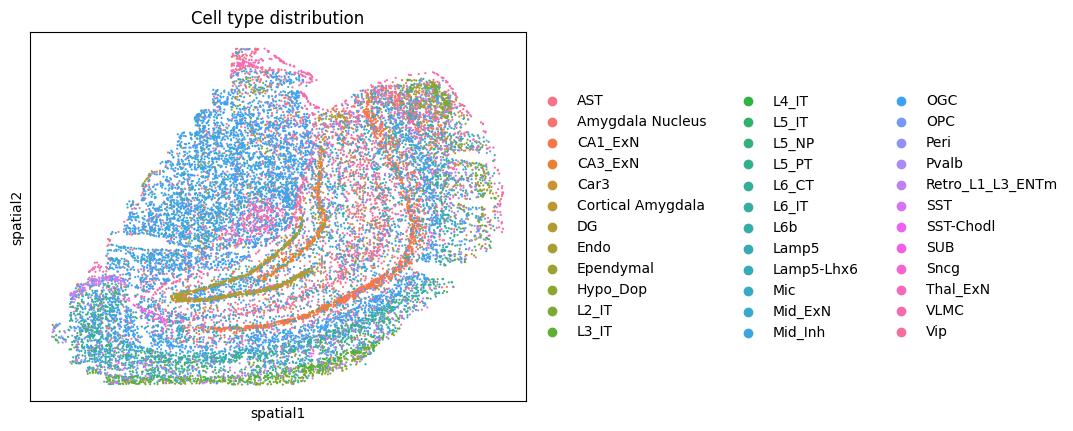

In [21]:
sc.pl.embedding(adata, basis='spatial', color='cluster', s=10, title='Cell type distribution')

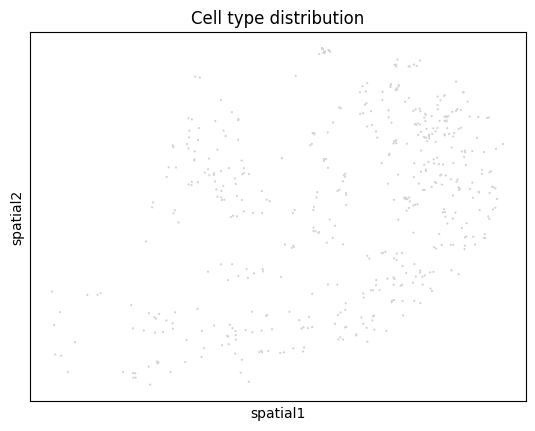

In [25]:
sc.pl.embedding(plaque, basis='spatial', s=10, title='Cell type distribution')

In [12]:
tree = cKDTree(plaque.obsm['spatial'])
idx, dist = tree.query(adata.obsm['spatial'], k=1)
adata.obs['distance_to_plaque'] = dist

In [13]:
adata

AnnData object with n_obs × n_vars = 19034 × 300
    obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine', 'distance_to_plaque'
    uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'Normalized_Expression', 'RNA'
    obsp: 'connectivities', 'distances'

In [14]:
moran_test = cm.al.compute_neighbor_moran_i_by_category(adata, 'distance_to_plaque', 'cluster', use_embedding=True, embedding_key='X_pca_harmony')

2024-10-09 08:46:08,624 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 08:46:08,627 - INFO - Identified 36 unique cell types in category 'cluster'.
2024-10-09 08:46:08,631 - INFO - Processing cell type: Amygdala Nucleus
2024-10-09 08:46:08,632 - INFO - Processing cell type: AST
2024-10-09 08:46:08,632 - INFO - Processing cell type: CA1_ExN
2024-10-09 08:46:08,633 - INFO - Processing cell type: CA3_ExN
2024-10-09 08:46:08,639 - INFO - Processing cell type: Car3
2024-10-09 08:46:08,642 - INFO - Processing cell type: Cortical Amygdala
2024-10-09 08:46:08,648 - INFO - Processing cell type: DG
2024-10-09 08:46:08,650 - INFO - Processing cell type: Endo
/public/home/jijh/micromamba/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [26]:
moran_test

,Moran's I,P-value,num_cell
cluster,,,
L2_IT,0.053334,0.000000e+00,763
CA1_ExN,0.035863,0.000000e+00,1108
Pvalb,0.026047,0.000000e+00,281
L5_NP,0.024972,8.434428e-91,128
CA3_ExN,0.021243,0.000000e+00,354
L5_PT,0.021113,0.000000e+00,259
L6_IT,0.021041,0.000000e+00,360
Mid_ExN,0.016151,0.000000e+00,579
Amygdala Nucleus,0.015157,2.245069e-152,239


In [9]:
from scipy.spatial import cKDTree

for key in intersection_keys:
    plaque = plaque_dict[key]
    adata = sample_dict[key]
    
    tree = cKDTree(plaque.obsm['spatial'])
    idx, dist = tree.query(adata.obsm['spatial'], k=1)
    adata.obs['distance_to_plaque'] = dist
    

In [8]:
for key, adata in sample_dict.items():
    adata.obs['celltype'] = adata.obs['cluster'].copy()
    chat_mask = adata.raw[:, 'Chat'].X > 0
    chat_mask = chat_mask.flatten()
    adata.obs['celltype'] = adata.obs['celltype'].cat.add_categories('ChN')
    adata.obs.loc[chat_mask, 'celltype'] = "ChN"


In [11]:
import logging
from concurrent.futures import ProcessPoolExecutor

# Configure logging to output to both console and file
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', handlers=[
    logging.FileHandler("moran_computation.log"),
    logging.StreamHandler()
])

def compute_moran_for_key(key):
    logging.info(f"Processing key: {key}")
    adata = sample_dict[key]
    
    moran_test = cm.al.compute_neighbor_moran_i_by_category(adata, 'distance_to_plaque', 'celltype', use_embedding=True, embedding_key='X_pca')
    logging.info(f"Completed processing key: {key}")
    return key, moran_test

moran_results = {}

with ProcessPoolExecutor(max_workers=4) as executor:
    futures = {executor.submit(compute_moran_for_key, key): key for key in intersection_keys}
    for future in futures:
        key, moran_test = future.result()
        moran_results[key] = moran_test
        logging.info(f"Result stored for key: {key}")


2024-10-09 17:11:12,382 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/
2024-10-09 17:11:12,383 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_0/
2024-10-09 17:11:12,383 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_3/
2024-10-09 17:11:12,383 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_0/
2024-10-09 17:11:12,389 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 17:11:12,389 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 17:11:12,389 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 17:11:12,389 - INFO - Starting Moran's I computation with value key 'distance_to_plaque'.
2024-10-09 17:11:1

In [12]:
moran_results

{'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/':                    Moran's I        P-value  num_cell
 celltype                                             
 CA1_ExN             0.091278   0.000000e+00      1619
 Pvalb               0.077442   0.000000e+00       844
 CA3_ExN             0.051880   0.000000e+00       637
 L2_IT               0.047625   0.000000e+00      2287
 L6b                 0.043050   0.000000e+00       359
 SST                 0.040634   0.000000e+00       566
 L6_IT               0.036717   0.000000e+00       846
 ChN                 0.034291   0.000000e+00      3548
 Car3                0.026268   8.063533e-30       164
 L5_PT               0.025906   0.000000e+00       589
 Lamp5-Lhx6          0.025778   7.933012e-19       134
 Mid_ExN             0.025044   0.000000e+00      2015
 Amygdala Nucleus    0.022612   4.249036e-73       311
 Vip                 0.020803   1.000073e-91       365
 L3_IT               0.02

In [13]:
for ke, df in moran_results.items():
    df.reset_index(inplace=True)
    df['sample'] = ke

In [14]:
con_results = pd.concat(moran_results.values(), ignore_index=True)

In [15]:
con_results.to_csv('moran_results_chn.csv', index=False)

In [16]:
con_results = con_results[con_results['P-value'] < 0.05]

In [21]:
con_results

,celltype,Moran's I,P-value,num_cell,sample
0,CA1_ExN,0.091278,0.000000,1619,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...
1,Pvalb,0.077442,0.000000,844,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...
2,CA3_ExN,0.051880,0.000000,637,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...
3,L2_IT,0.047625,0.000000,2287,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...
4,L6b,0.043050,0.000000,359,Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_...
...,...,...,...,...,...
348,Pvalb,-0.002456,0.036056,248,Z:/Lab/MERFISH_Imaging data/202302031055_20230...
350,Vip,-0.003650,0.011047,132,Z:/Lab/MERFISH_Imaging data/202302031055_20230...
351,L3_IT,-0.004207,0.002240,126,Z:/Lab/MERFISH_Imaging data/202302031055_20230...
352,VLMC,-0.005091,0.014730,93,Z:/Lab/MERFISH_Imaging data/202302031055_20230...


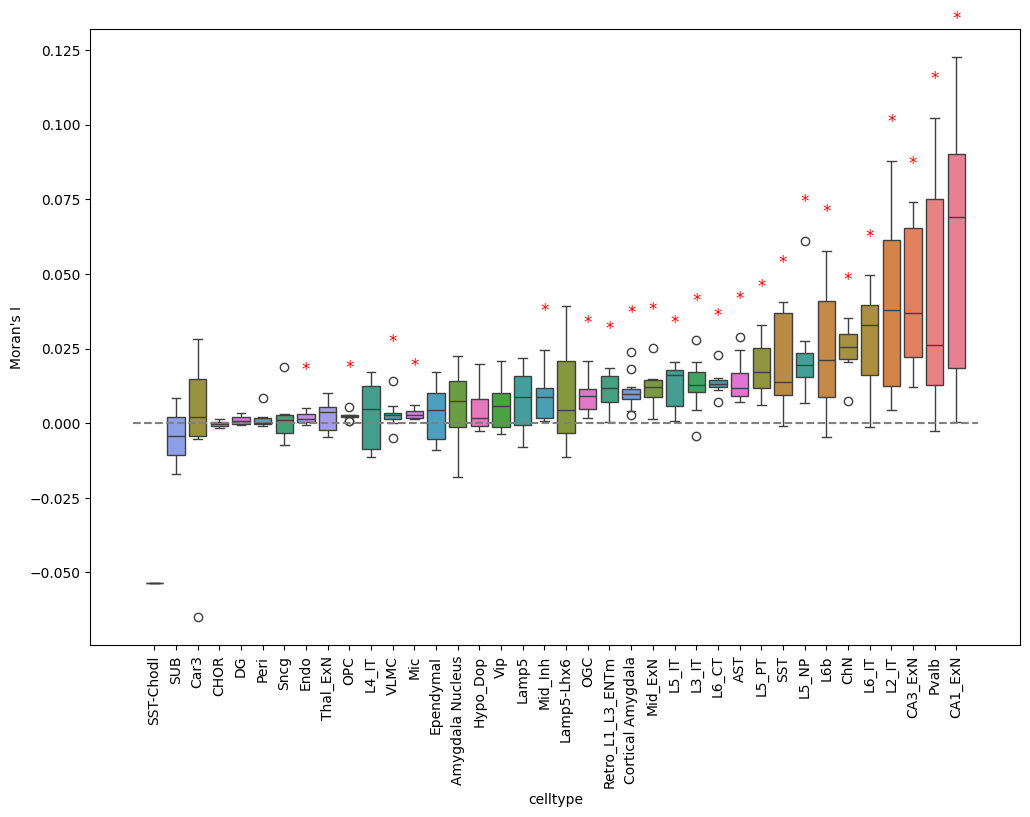

In [20]:
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt

# Calculate the mean of Moran's I for each cluster
mean_morans_i = con_results.groupby('celltype')["Moran's I"].mean().sort_values()

# Perform Wilcoxon rank sum test for each cluster
significant_clusters = []
for cluster in mean_morans_i.index:
    cluster_data = con_results[con_results['celltype'] == cluster]["Moran's I"].dropna()
    if len(cluster_data) > 0:
        stat, p_value = wilcoxon(cluster_data - 0)
        if p_value < 0.05:
            significant_clusters.append(cluster)

# Create a boxplot with adjusted figure size and sorted clusters
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=con_results, x='celltype', y="Moran's I", hue='celltype', order=mean_morans_i.index)
ax.hlines(0, -1, len(mean_morans_i), linestyles='dashed', colors='gray')
plt.xticks(rotation=90)

# Add asterisks to significant clusters
for i, cluster in enumerate(mean_morans_i.index):
    if cluster in significant_clusters:
        plt.text(i, con_results[con_results['celltype'] == cluster]["Moran's I"].max() + 0.01, '*', 
                 ha='center', va='bottom', color='red', fontsize=12)

plt.show()

In [26]:
adata

AnnData object with n_obs × n_vars = 56273 × 300
    obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine', 'celltype', 'distance_to_plaque'
    uns: 'celltype_colors', 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap', 'region_labels_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'Normalized_Expression', 'RNA'
    obsp: 'connectivities', 'distances'

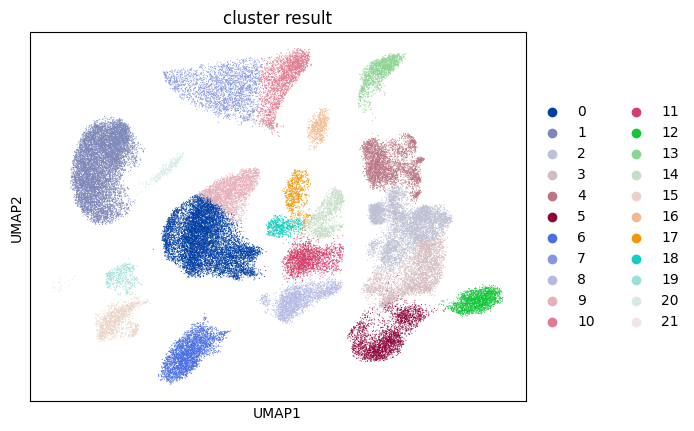

In [48]:
sc.pl.umap(adata, color='leiden', title='cluster result')

## Plit by regions GOLD

In [47]:
intersection_keys

['Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/',
 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_0/',
 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_0/',
 'Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_3/',
 'Z:/Lab/MERFISH_Imaging data/202209041036_20220904-5xFAD-TREM2-AnteHip-300x05_VMSC00101/region_0/',
 'Z:/Lab/MERFISH_Imaging data/202204011403_20220401135320220401TREM5xADF12mo4hemip_VMSC00101/region_1/',
 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_3/',
 'Z:/Lab/MERFISH_Imaging data/Kim_202201111602_20220111-WT-5xFAD10518pHip300GP_VMSC00101/region_1/',
 'Z:/Lab/MERFISH_Imaging data/202302031055_20230203TREM5xFAD-VZG171x04_VMSC05201/region_1/',
 'Z:/Lab/MERFISH_Imaging data/202302031055_20230203TREM5xFAD-VZG171x04_VMSC05201/region_0/']

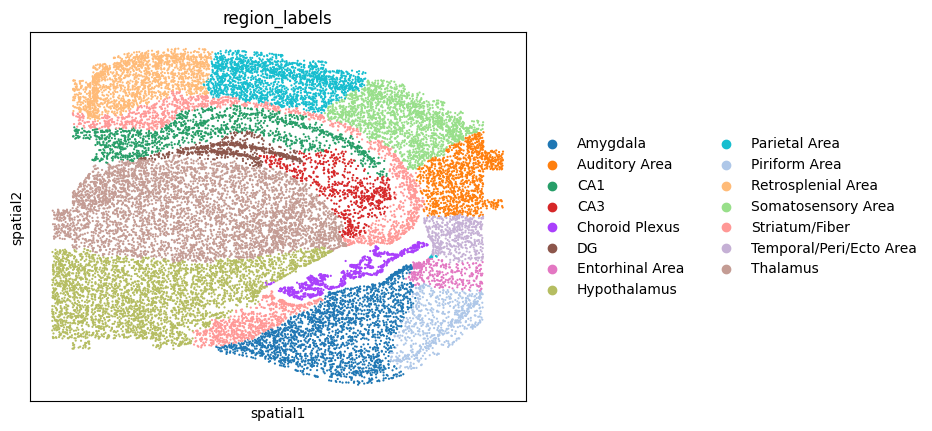

In [49]:
adata = sample_dict[intersection_keys[4]].copy()
sc.pl.embedding(adata, basis='spatial', color='region_labels', size=10)

In [50]:
adata.obs['region_labels'].unique()
unique_region_labels = []
for key in intersection_keys:
    adata = sample_dict[key]
    unique_region_labels.extend(adata.obs['region_labels'].unique())

unique_region_labels = list(set(unique_region_labels))
unique_region_labels

['Parietal Area',
 'Midbrain',
 'CA1',
 'Retrosplenial Area',
 'Amygdala',
 'Hypothalamus',
 'Temporal/Peri/Ecto Area',
 'Thalamus',
 'DG',
 'Auditory Area',
 'Somatosensory Area',
 'CA3',
 'Choroid Plexus',
 'Striatum/Fiber',
 'Piriform Area',
 'Visual Area',
 'Entorhinal Area']

In [42]:
adata.obs['region_labels'].value_counts().index

CategoricalIndex(['Midbrain', 'Retrosplenial Area', 'Auditory Area', 'CA3',
                  'Thalamus', 'CA1', 'Hypothalamus', 'Visual Area', 'Amygdala',
                  'DG', 'Parietal Area', 'Striatum/Fiber',
                  'Temporal/Peri/Ecto Area', 'Entorhinal Area',
                  'Piriform Area', 'Somatosensory Area'],
                 categories=['Amygdala', 'Auditory Area', 'CA1', 'CA3', ..., 'Striatum/Fiber', 'Temporal/Peri/Ecto Area', 'Thalamus', 'Visual Area'], ordered=False, dtype='category', name='region_labels')

In [32]:
df = adata.obs.groupby('region_labels')['celltype'].value_counts().reset_index(name='count')

/tmp/ipykernel_84039/722785114.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = adata.obs.groupby('region_labels')['celltype'].value_counts().reset_index(name='count')


In [37]:
df['proportion'] = df['count'] / df.groupby('region_labels')['count'].transform('sum') 

/tmp/ipykernel_84039/1986252466.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['proportion'] = df['count'] / df.groupby('region_labels')['count'].transform('sum')


In [39]:
df[df['celltype'] == "ChN"]

,region_labels,celltype,count,proportion
4,Amygdala,ChN,219,0.070989
42,Auditory Area,ChN,371,0.084318
80,CA1,ChN,284,0.074560
119,CA3,ChN,281,0.064986
154,DG,ChN,228,0.081429
195,Entorhinal Area,ChN,97,0.067314
232,Hypothalamus,ChN,149,0.041206
272,Midbrain,ChN,409,0.037297
309,Parietal Area,ChN,193,0.075568
346,Piriform Area,ChN,88,0.073826


In [ ]:
['Parietal Area',
    'Midbrain',
    'CA1',
    'Retrosplenial Area',
    'Amygdala',
    'Hypothalamus',
    'Temporal/Peri/Ecto Area',
    'Thalamus',
    'DG',
    'Auditory Area',
    'Somatosensory Area',
    'CA3',
    'Choroid Plexus',
    'Striatum/Fiber',
    'Piriform Area',
    'Visual Area',
    'Entorhinal Area']

In [51]:
region_map = {
    'CA1': 'HPF',
    'CA2': 'HPF',
    'CA3': 'HPF',
    'DG': 'HPF',
    'Striatum/Fiber': 'STR',
    'Thalamus': 'TH',
    'Retrospenial Area': 'RS',
    'Entorhinal Area': 'ENT',
    'Hypothalamus': 'HPT',
    'Midbrain': 'MB',
    'Amygdala': 'BF',
    'Temporal/Peri/Ecto Area': 'CTX',
    'Auditory Area': 'CTX',
    'Somatosensory Area': 'CTX',
    'Piriform Area': 'CTX',
    'Visual Area': 'CTX',
    'Choroid Plexus': 'CP',
}

In [52]:
for key, adata in sample_dict.items():
    adata.obs['region_abb'] = adata.obs['region_labels'].map(region_map)

In [54]:
region_sample_dict = {}

for key in intersection_keys:
    adata = sample_dict[key]
    for region in adata.obs['region_abb'].unique():
        region_key = f"{key}_{region}"
        region_sample_dict[region_key] = adata[adata.obs['region_abb'] == region].copy()

region_sample_dict

{'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/_CTX': AnnData object with n_obs × n_vars = 12023 × 300
     obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_max', 'y_min', 'y_max', 'volume', 'sample', 'seurat_clusters', 'cluster', 'coarse_batch', 'gen', 'gen_coarse', 'counts', 'region_labels', 'plaque_distance', 'region_labels_coarse', 'leiden', 'cluster_coarse', 'gen_fine', 'celltype', 'distance_to_plaque', 'region_abb'
     uns: 'cluster_coarse_colors', 'cluster_colors', 'cluster_grey_colors', 'gen_coarse_colors', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
     obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'spatial'
     varm: 'PCs'
     layers: 'Normalized_Expression', 'RNA'
     obsp: 'connectivities', 'distances',
 'Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/_HPF': AnnData object with n_obs × n_vars = 10933 × 300
     obs: 'fov', 'center_x', 'center_y', 'x_min', 'x_ma

In [55]:
region_gold_result = {}

def compute_moran_for_key(key):
    logging.info(f"Processing key: {key}")
    adata = region_sample_dict[key]
    
    moran_test = cm.al.compute_neighbor_moran_i_by_category(adata, 'distance_to_plaque', 'celltype', use_embedding=True, embedding_key='X_pca')
    logging.info(f"Completed processing key: {key}")
    return key, moran_test

with ProcessPoolExecutor(max_workers=8) as executor:
    futures = {executor.submit(compute_moran_for_key, key): key for key in region_sample_dict.keys()}
    for future in futures:
        key, moran_test = future.result()
        region_gold_result[key] = moran_test
        logging.info(f"Result stored for key: {key}")


2024-10-09 19:13:02,595 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/_CTX
2024-10-09 19:13:02,596 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/_BF
2024-10-09 19:13:02,596 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/_ENT
2024-10-09 19:13:02,596 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/_HPF
2024-10-09 19:13:02,596 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/_nan
2024-10-09 19:13:02,597 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/region_1/_MB
2024-10-09 19:13:02,596 - INFO - Processing key: Z:/Lab/MERFISH_Imaging data/Kim2_202112171955_12172021TREM2-5x12Mo300GP_VMSC00101/r

: 

# Temporaly used for WX

In [9]:
adata.obs['label']
label_dict = {label: adata[adata.obs['label'] == label].copy() for label in adata.obs['label'].unique()}

19042    13months-disease-replicate_2
19043    13months-disease-replicate_2
19045    13months-disease-replicate_2
19046    13months-disease-replicate_2
19047    13months-disease-replicate_2
                     ...             
76840     8months-disease-replicate_2
76842     8months-disease-replicate_2
76843     8months-disease-replicate_2
76845     8months-disease-replicate_2
76846     8months-disease-replicate_2
Name: label, Length: 36394, dtype: category
Categories (4, object): ['8months-disease-replicate_1', '8months-disease-replicate_2', '13months-disease-replicate_1', '13months-disease-replicate_2']

In [12]:
label_dict

{'13months-disease-replicate_2': AnnData object with n_obs × n_vars = 9634 × 2766
     obs: 'X_x', 'Y_x', 'X-scaled', 'Y-scaled', 'label', 'top_level_cell_type_x', 'sub_level_cell_type_x', 'dist', 'X_y', 'Y_y', 'top_level_cell_type_y', 'sub_level_cell_type_y', 'umap_x', 'umap_y', 'log_dist', 'celltype', 'chat_dist', 'Astro_dist', 'LHb_dist', 'CTX-Ex_dist', 'Oligo_dist', 'Micro_dist', 'OPC_dist', 'Inh_dist', 'SMC_dist', 'Endo_dist', 'ChN_dist', 'DG_dist', 'CA3_dist', 'CA2_dist', 'CA1_dist', 'fine', 'Astro1_dist', 'CTX-Ex2_dist', 'Oligo1_dist', 'Micro1_dist', 'Micro2_dist', 'Pvalb_Nog_dist', 'Astro3_dist', 'CTX-Ex3_dist', 'S5_dist', 'Oligo2_dist', 'Vip_dist', 'Lamp5_dist', 'Micro3_dist', 'Endo1_dist', 'Pvalb_dist', 'S3_dist', 'S4_dist', 'S2_dist', 'Oligo3_dist', 'Endo2_dist', 'S1_dist', 'Endo3_dist', 'Sst_dist', 'Astro2_dist', 'CA3-Ex_dist', 'CA2-Ex_dist', 'CA1-Ex_dist', 'Cnr1_dist', 'CTX-Ex4_dist', 'CTX-Ex1_dist'
     var: 'gene_name'
     uns: 'celltype_colors', 'top_level_cell_type_x_

In [13]:
for key, adata in label_dict.items():
    adata.write(f'{key}.h5ad')

# WT Data View

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import cellbin_moran as cm
import seaborn as sns

In [51]:
adata = sc.read_h5ad('/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/wt_sct_cellbin_h5ad/WT4M03_sct_counts.h5ad')

/public/home/jijh/micromamba/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [52]:
adata.obsm['spatial'] = np.array(adata.obs[['x', 'y']])

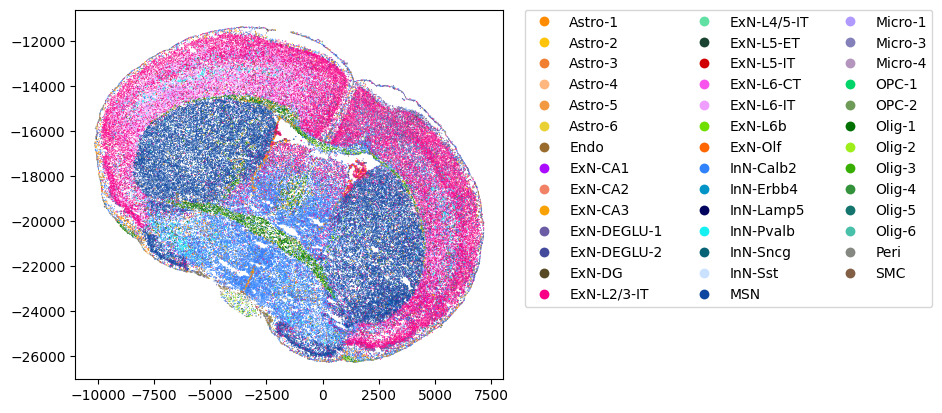

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume adata.obs contains the data and that x, y, and fine are valid columns
fig, ax = plt.subplots()

# Rotation angle in degrees and radians
theta = np.deg2rad(-140)  # 135 degrees clockwise

# Compute the rotation matrix for 135 degrees
rotation_matrix = np.array([[np.cos(theta), np.sin(theta)],
                            [-np.sin(theta), np.cos(theta)]])

# Extract original x and y coordinates
x = adata.obs['x'].values
y = adata.obs['y'].values

# Apply the rotation matrix to the (x, y) points
rotated_coords = np.dot(np.c_[x, y], rotation_matrix)

# Create a new scatter plot with the rotated coordinates
scatter = sns.scatterplot(
    x=rotated_coords[:, 0], 
    y=rotated_coords[:, 1], 
    hue=adata.obs['fine'], 
    ax=ax, 
    palette=cm.pl.palettes.cell_type_colors, 
    s=0.5, 
    linewidth=0, 
)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Move the legend to the right of the figure outside the main plot
# and make the points of the legend larger and display the legend in appropriate number of columns
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., markerscale=10, ncol=3)

plt.show()


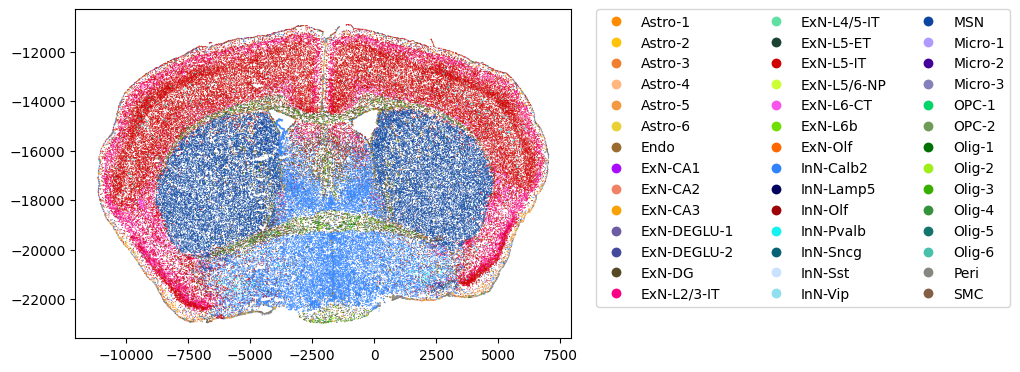

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume adata.obs contains the data and that x, y, and fine are valid columns
fig, ax = plt.subplots()

# Rotation angle in degrees and radians
theta = np.deg2rad(-140)  # 135 degrees clockwise

# Compute the rotation matrix for 135 degrees
rotation_matrix = np.array([[np.cos(theta), np.sin(theta)],
                            [-np.sin(theta), np.cos(theta)]])

# Extract original x and y coordinates
x = adata.obs['x'].values
y = adata.obs['y'].values

# Apply the rotation matrix to the (x, y) points
rotated_coords = np.dot(np.c_[x, y], rotation_matrix)

# Create a new scatter plot with the rotated coordinates
scatter = sns.scatterplot(
    x=rotated_coords[:, 0], 
    y=rotated_coords[:, 1], 
    hue=adata.obs['fine'], 
    ax=ax, 
    palette=cm.pl.palettes.cell_type_colors, 
    s=0.5, 
    linewidth=0, 
)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Move the legend to the right of the figure outside the main plot
# and make the points of the legend larger and display the legend in appropriate number of columns
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., markerscale=10, ncol=3)

plt.show()


In [48]:
test_data = sc.read_h5ad('/home1/jijh/st_project/cellbin_analysis/annotated_cell_bins/wt_sct_cellbin_h5ad/WT5M03_sct_counts.h5ad')

/public/home/jijh/micromamba/envs/scanpy/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [49]:
test_data.obsm['spatial'] = np.array(test_data.obs[['x', 'y']])

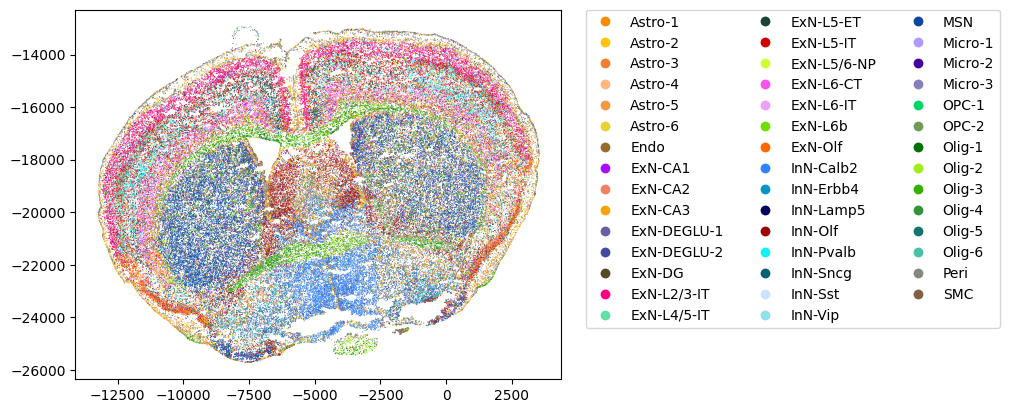

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume adata.obs contains the data and that x, y, and fine are valid columns
fig, ax = plt.subplots()

# Rotation angle in degrees and radians
theta = np.deg2rad(-140)  # 135 degrees clockwise

# Compute the rotation matrix for 135 degrees
rotation_matrix = np.array([[np.cos(theta), np.sin(theta)],
                            [-np.sin(theta), np.cos(theta)]])

# Extract original x and y coordinates
x = test_data.obs['x'].values
y = test_data.obs['y'].values

# Apply the rotation matrix to the (x, y) points
rotated_coords = np.dot(np.c_[x, y], rotation_matrix)

# Create a new scatter plot with the rotated coordinates
scatter = sns.scatterplot(
    x=rotated_coords[:, 0], 
    y=rotated_coords[:, 1], 
    hue=test_data.obs['fine'], 
    ax=ax, 
    palette=cm.pl.palettes.cell_type_colors, 
    s=0.5, 
    linewidth=0, 
)

# Set aspect ratio to be equal
ax.set_aspect('equal')

# Move the legend to the right of the figure outside the main plot
# and make the points of the legend larger and display the legend in appropriate number of columns
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., markerscale=10, ncol=3)

plt.show()
